# Constants

In [2]:
DATASET_PATH = '../data/breast_cancer.csv'

# Imports

In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn utilities
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# Boosting algorithm
# import lightgbm as lgb

# Add path to local project source code
import sys
sys.path.append('../src')

# Import custom Repeated Nested CV class
from RepeatedNestedCV import RepeatedNestedCV

# Analysis

## Algorithms & Params

In [3]:
estimators = {
    "LR": LogisticRegression,
    "SVC": lambda **kwargs: SVC(probability=True, **kwargs), # Without this fixed value, AUC will be none for SVM
    # "RF": RandomForestClassifier,
    # "GNB": GaussianNB,
    # "LDA": LinearDiscriminantAnalysis,
}

param_spaces = {
    "LR": lambda trial: {
        'C': trial.suggest_float('C', 1e-4, 1e2, log=True),
        'l1_ratio': trial.suggest_float('l1_ratio', 0, 1),
        'solver': 'saga',                      # Fixed
        'penalty': 'elasticnet',              # Fixed
        'max_iter': 1000                      # Fixed
    },
    "SVC": lambda trial: {
        'C': trial.suggest_float('C', 1e-3, 1e2, log=True),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e0, log=True),
    },
}

## Prepare Dataset

In [4]:
df = pd.read_csv(DATASET_PATH)
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].replace({'M': '1', 'B': '0'}).astype(int)
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


## nCV

In [5]:
# Extract X and y from dataframe
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

In [5]:
rncv = RepeatedNestedCV(
    X=X,
    y=y,
    estimators=estimators,
    param_spaces=param_spaces,
)

rncv.run()

[I 2025-04-24 20:48:46,785] A new study created in memory with name: no-name-565a65ec-fa73-4a5d-87ef-1df1a12fcc6b
[I 2025-04-24 20:48:46,842] Trial 0 finished with value: 0.9389957365189563 and parameters: {'C': 16.75148380712717, 'l1_ratio': 0.8014271401471621}. Best is trial 0 with value: 0.9389957365189563.
[I 2025-04-24 20:48:46,856] Trial 1 finished with value: 0.9378483026417296 and parameters: {'C': 0.053477864510439704, 'l1_ratio': 0.08179996670033551}. Best is trial 0 with value: 0.9389957365189563.
[I 2025-04-24 20:48:46,902] Trial 2 finished with value: 0.9389957365189563 and parameters: {'C': 54.22756903639239, 'l1_ratio': 0.11239804945062704}. Best is trial 0 with value: 0.9389957365189563.
[I 2025-04-24 20:48:46,915] Trial 3 finished with value: 0.43675847660667394 and parameters: {'C': 0.0034602547223685767, 'l1_ratio': 0.9589153858131094}. Best is trial 0 with value: 0.9389957365189563.
[I 2025-04-24 20:48:46,928] Trial 4 finished with value: 0.9091244232537914 and para

[{'repetition': 1,
  'outer_fold': 1,
  'estimator': 'LR',
  'MCC': 1.0,
  'AUC': 1.0,
  'BA': 1.0,
  'F1': 1.0,
  'F2': 1.0,
  'Recall': 1.0,
  'Precision': 1.0},
 {'repetition': 1,
  'outer_fold': 1,
  'estimator': 'SVC',
  'MCC': 0.9386072351740327,
  'AUC': 0.9971955128205128,
  'BA': 0.9715544871794872,
  'F1': 0.9620253164556962,
  'F2': 0.9693877551020408,
  'Recall': 0.9743589743589743,
  'Precision': 0.95},
 {'repetition': 1,
  'outer_fold': 2,
  'estimator': 'LR',
  'MCC': 0.8953728533015665,
  'AUC': 0.9890688259109311,
  'BA': 0.9451417004048583,
  'F1': 0.9333333333333333,
  'F2': 0.9259259259259259,
  'Recall': 0.9210526315789473,
  'Precision': 0.9459459459459459},
 {'repetition': 1,
  'outer_fold': 2,
  'estimator': 'SVC',
  'MCC': 0.9164923742549432,
  'AUC': 0.9923076923076923,
  'BA': 0.952834008097166,
  'F1': 0.9459459459459459,
  'F2': 0.9308510638297872,
  'Recall': 0.9210526315789473,
  'Precision': 0.9722222222222222},
 {'repetition': 1,
  'outer_fold': 3,
  'e

In [6]:
df_results = rncv.to_dataframe()
df_results

,repetition,outer_fold,estimator,MCC,AUC,BA,F1,F2,Recall,Precision
0,1,1,LR,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,1,SVC,0.938607,0.997196,0.971554,0.962025,0.969388,0.974359,0.950000
2,1,2,LR,0.895373,0.989069,0.945142,0.933333,0.925926,0.921053,0.945946
3,1,2,SVC,0.916492,0.992308,0.952834,0.945946,0.930851,0.921053,0.972222
4,1,3,LR,0.937627,0.997944,0.971217,0.961039,0.968586,0.973684,0.948718
...,...,...,...,...,...,...,...,...,...,...
95,10,3,SVC,0.854147,0.960115,0.913240,0.901408,0.864865,0.842105,0.969697
96,10,4,LR,0.916118,0.991365,0.958059,0.947368,0.947368,0.947368,0.947368
97,10,4,SVC,0.894783,0.993010,0.944901,0.933333,0.925926,0.921053,0.945946
98,10,5,LR,0.936959,0.995888,0.965872,0.960000,0.952381,0.947368,0.972973


## Comparison

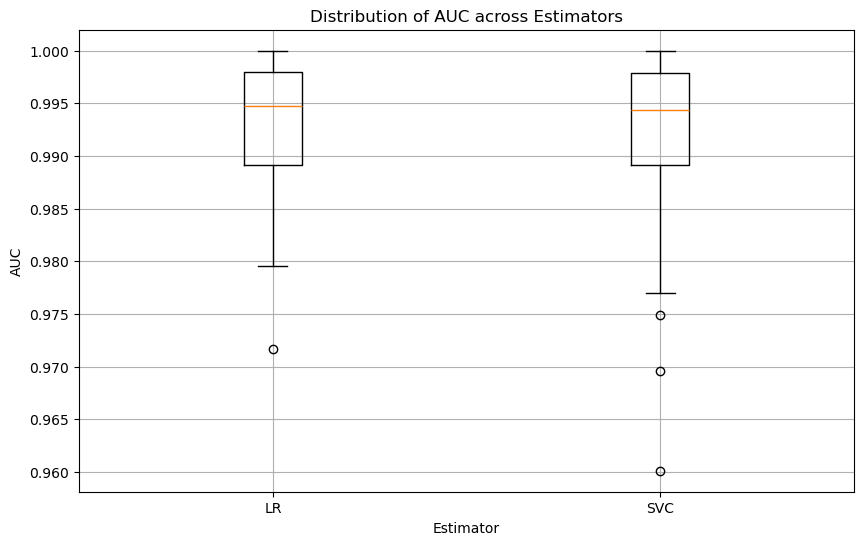

In [7]:
# Group AUC scores by estimator
grouped = df_results.groupby('estimator')['AUC'].apply(list)

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped.values, tick_labels=grouped.index)

plt.title('Distribution of AUC across Estimators')
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.grid(True)
plt.show()